In [164]:
import numpy
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import train_test_split
numpy.random.seed(10)

In [165]:
all_df = pd.read_csv("data/titanic.csv")

In [166]:
cols=['survived','pclass' ,'sex', 'age',
       'fare',]
df=all_df[cols]
df.isnull().sum()
df=df.values

In [167]:
X = df[:,1:]
Y = df[:,0]
X[:5]

array([[  1.    ,   0.    ,  29.    , 211.3375],
       [  1.    ,   1.    ,   0.9167, 151.55  ],
       [  1.    ,   0.    ,   2.    , 151.55  ],
       [  1.    ,   1.    ,  30.    , 151.55  ],
       [  1.    ,   0.    ,  25.    , 151.55  ]])

In [168]:
 X = StandardScaler().fit_transform(X)
train_Features, test_Features, train_Label, test_Label = train_test_split(X, Y, test_size=0.2, random_state=True) 
len(train_Features)

1046

In [169]:
train_Features[355:359]

array([[ 0.84246649, -1.34419751,  0.8216082 , -0.46039806],
       [ 0.84246649, -1.34419751,  0.09991351, -0.19415727],
       [ 0.84246649,  0.74393829, -0.18876436, -0.49092056],
       [-0.35140802, -1.34419751,  0.17208298, -0.23764487]])

In [170]:
train_Label[:4]

array([1., 0., 0., 0.])

In [171]:
test_Features.shape

(262, 4)

In [172]:
test_Label.shape

(262,)

In [173]:
from keras.models import Sequential
from keras.layers.embeddings import Embedding
from keras.layers import Dense,Dropout,Flatten,Conv1D,MaxPooling1D

In [174]:
train_Features.shape

(1046, 4)

In [175]:
train_Features = train_Features.reshape(train_Features.shape[0], 4, 1)

In [176]:
train_Features.shape

(1046, 4, 1)

In [177]:
from keras.utils import np_utils
train_Label = train_Label.reshape(train_Label.shape[0], 1)
test_Label= test_Label.reshape(test_Label.shape[0], 1)
train_Label=np_utils.to_categorical(train_Label)
test_Label=np_utils.to_categorical(test_Label)

In [178]:
model = Sequential()

In [179]:
model.add(Conv1D(filters=100,
                 kernel_size=3,
                 padding='valid',
                 input_shape=(4,1), 
                 activation='relu'))

In [180]:
model.add(Conv1D(filters=50,
                 kernel_size=1,
                 padding='valid',
                 activation='relu'))

In [181]:
model.add(MaxPooling1D(pool_size=1))

In [182]:
model.add(Dropout(0.25))

In [183]:
model.add(Flatten())

In [184]:
model.add(Dense(50, activation='tanh'))

In [185]:
model.add(Dropout(0.25))

In [186]:
model.add(Dense(2,activation='sigmoid'))

In [187]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_13 (Conv1D)           (None, 2, 100)            400       
_________________________________________________________________
conv1d_14 (Conv1D)           (None, 2, 50)             5050      
_________________________________________________________________
max_pooling1d_4 (MaxPooling1 (None, 2, 50)             0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 2, 50)             0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 100)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 50)                5050      
_________________________________________________________________
dropout_8 (Dropout)          (None, 50)                0         
__________

In [188]:
model.compile(loss='mean_squared_error',
              optimizer='Nadam',metrics=['accuracy']) 
model.fit(x=train_Features,y=train_Label)

Epoch 1/1
1046/1046 [==============================] - 1s 1ms/step - loss: 0.1937 - acc: 0.7428


In [189]:
train_history =model.fit(x=train_Features, 
                         y=train_Label, 
                         validation_split=0.2, 
                         epochs=30, 
                         batch_size=30,verbose=2)

Train on 836 samples, validate on 210 samples
Epoch 1/30
 - 0s - loss: 0.1516 - acc: 0.7823 - val_loss: 0.1639 - val_acc: 0.7476
Epoch 2/30
 - 0s - loss: 0.1489 - acc: 0.7919 - val_loss: 0.1570 - val_acc: 0.7857
Epoch 3/30
 - 0s - loss: 0.1513 - acc: 0.7883 - val_loss: 0.1553 - val_acc: 0.7762
Epoch 4/30
 - 0s - loss: 0.1514 - acc: 0.7871 - val_loss: 0.1536 - val_acc: 0.7810
Epoch 5/30
 - 0s - loss: 0.1450 - acc: 0.7907 - val_loss: 0.1546 - val_acc: 0.7810
Epoch 6/30
 - 0s - loss: 0.1487 - acc: 0.7859 - val_loss: 0.1524 - val_acc: 0.7810
Epoch 7/30
 - 0s - loss: 0.1496 - acc: 0.7859 - val_loss: 0.1519 - val_acc: 0.7810
Epoch 8/30
 - 0s - loss: 0.1451 - acc: 0.7895 - val_loss: 0.1511 - val_acc: 0.8095
Epoch 9/30
 - 0s - loss: 0.1459 - acc: 0.7943 - val_loss: 0.1529 - val_acc: 0.7714
Epoch 10/30
 - 0s - loss: 0.1439 - acc: 0.7883 - val_loss: 0.1574 - val_acc: 0.7429
Epoch 11/30
 - 0s - loss: 0.1477 - acc: 0.7955 - val_loss: 0.1533 - val_acc: 0.7762
Epoch 12/30
 - 0s - loss: 0.1460 - acc:

In [190]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

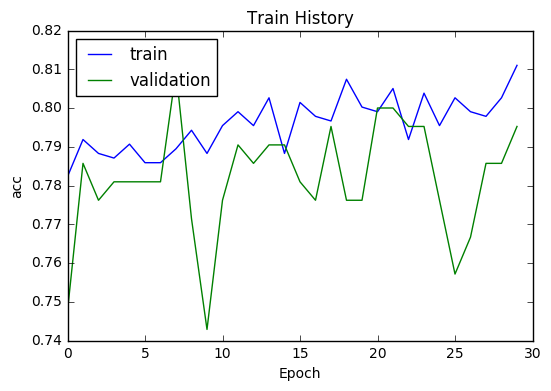

In [191]:
show_train_history(train_history,'acc','val_acc')

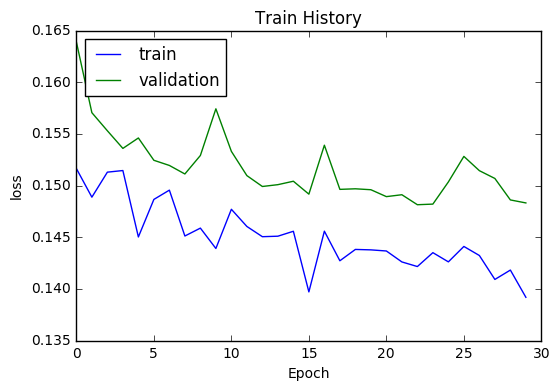

In [192]:
show_train_history(train_history,'loss','val_loss')

In [193]:
test_Features = test_Features.reshape(test_Features.shape[0], 4,  1)

In [194]:
scores = model.evaluate(x=test_Features, 
                        y=test_Label)

262/262 [==============================] - 0s 73us/step


In [195]:
scores[1]

0.8358778625954199